In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv("../../src/data/city_growth_models/population-cairo_1950_to_2035.csv")
df

,growth,growthRate,population,year
0,651072,0.023375,28504352,2035
1,623526,0.022899,27853280,2034
2,596806,0.022409,27229754,2033
3,570172,0.021877,26632948,2032
4,546080,0.021401,26062776,2031
...,...,...,...,...
81,111220,0.039688,2913563,1954
82,106830,0.039633,2802343,1953
83,103036,0.039744,2695513,1952
84,98963,0.039688,2592477,1951


In [5]:
print(df.isna().sum())


growth        0
growthRate    0
population    0
year          0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [7]:
df.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,302451.604651,0.028782,1.240824e+07,1992.500000
std,141887.524408,0.009884,7.619804e+06,24.969982
min,0.000000,0.000000,2.493514e+06,1950.000000
25%,179109.500000,0.021767,5.789828e+06,1971.250000
50%,306336.000000,0.025347,1.088019e+07,1992.500000
75%,412024.750000,0.038730,1.832104e+07,2013.750000
max,651072.000000,0.052484,2.850435e+07,2035.000000


### Outliers

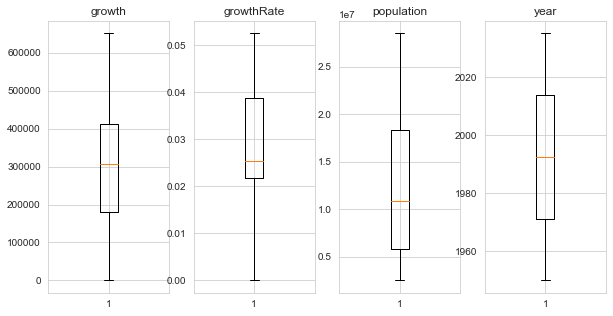

In [8]:
columns = ['growth','growthRate','population','year']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

### Binning for analytics

In [9]:
pd.cut(df['year'], bins=2).value_counts()

(1949.915, 1992.5]    43
(1992.5, 2035.0]      43
Name: year, dtype: int64

In [10]:
labels = ['Late 20th Century','21st Century']
cut_bins = [1950,2000,2035]
df['Historical'] = pd.cut(df['year'], bins=cut_bins, labels=labels)

In [11]:
df.head()

,growth,growthRate,population,year,Historical
0,651072,0.023375,28504352,2035,21st Century
1,623526,0.022899,27853280,2034,21st Century
2,596806,0.022409,27229754,2033,21st Century
3,570172,0.021877,26632948,2032,21st Century
4,546080,0.021401,26062776,2031,21st Century


In [12]:
df = df.drop('Historical', axis=1)

In [13]:
df = df.rename(columns={'growth': 'population_growth', 'growthRate': 'population_growth_rate'})

In [14]:
df['Country'] = 'Egypt'
df['City'] = 'Cairo'

In [15]:
df

,population_growth,population_growth_rate,population,year,Country,City
0,651072,0.023375,28504352,2035,Egypt,Cairo
1,623526,0.022899,27853280,2034,Egypt,Cairo
2,596806,0.022409,27229754,2033,Egypt,Cairo
3,570172,0.021877,26632948,2032,Egypt,Cairo
4,546080,0.021401,26062776,2031,Egypt,Cairo
...,...,...,...,...,...,...
81,111220,0.039688,2913563,1954,Egypt,Cairo
82,106830,0.039633,2802343,1953,Egypt,Cairo
83,103036,0.039744,2695513,1952,Egypt,Cairo
84,98963,0.039688,2592477,1951,Egypt,Cairo


In [17]:
df.rename(columns={'year':'Year' } , inplace=True )

In [ ]:
df.to_csv('../../task 2 data preprocessing/processedData/population-cairo_1950_to_2035_processed.csv',index=False)
